In [ ]:
%matplotlib inline



Welcome to the "Outlier Detection" practical session.  

Programming Language : Python 
Editor : Jupyter Notebook. 


Pandas : Data loading, processing, transformation and manipulation.
Scikit-learn : Example data source, ML and statistical analysis

# Outlier Detection
This example illustrates 
- How to identify outliers.
- How to deal with outliers. 


In [2]:
# Author:  Mamun Rashid <m.rrashid.1@gmail.com>

# License: BSD 3 clause

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats

# Load the dataset
# For this practical we use the breast cancer data set.  
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Let's look at the first few rows of the dataframe
print(df)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### Data Description

This is an analysis of the Breast Cancer Wisconsin (Diagnostic) DataSet, obtained from Kaggle. This data set was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin,USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector

Attribute Information:

ID number 2) Diagnosis (M = malignant, B = benign) 3-32)
Ten real-valued features are computed for each cell nucleus:

radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness (local variation in radius lengths)
compactness (perimeter^2 / area - 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symmetry
fractal dimension (“coastline approximation” - 1)
The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


https://rstudio-pubs-static.s3.amazonaws.com/344010_1f4d6691092d4544bfbddb092e7223d2.html

#### Strategy 1 : Outlier Removal 

We will visualizes the original data, including outliers, using a boxplot. 
Each box in the boxplot represents one column (or feature) in the data, with outliers shown as points that are distant from the main body of the box.

The code then creates a new DataFrame, df_o, which is the same as the original DataFrame df but with all rows containing any outliers removed. 
The Z-scores for the new DataFrame are then calculated, to confirm that all outliers have been removed.

The Final code block visualizes the new, outlier-free data using another boxplot. 
This can be compared with the original boxplot to see the effect of removing the outliers.


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

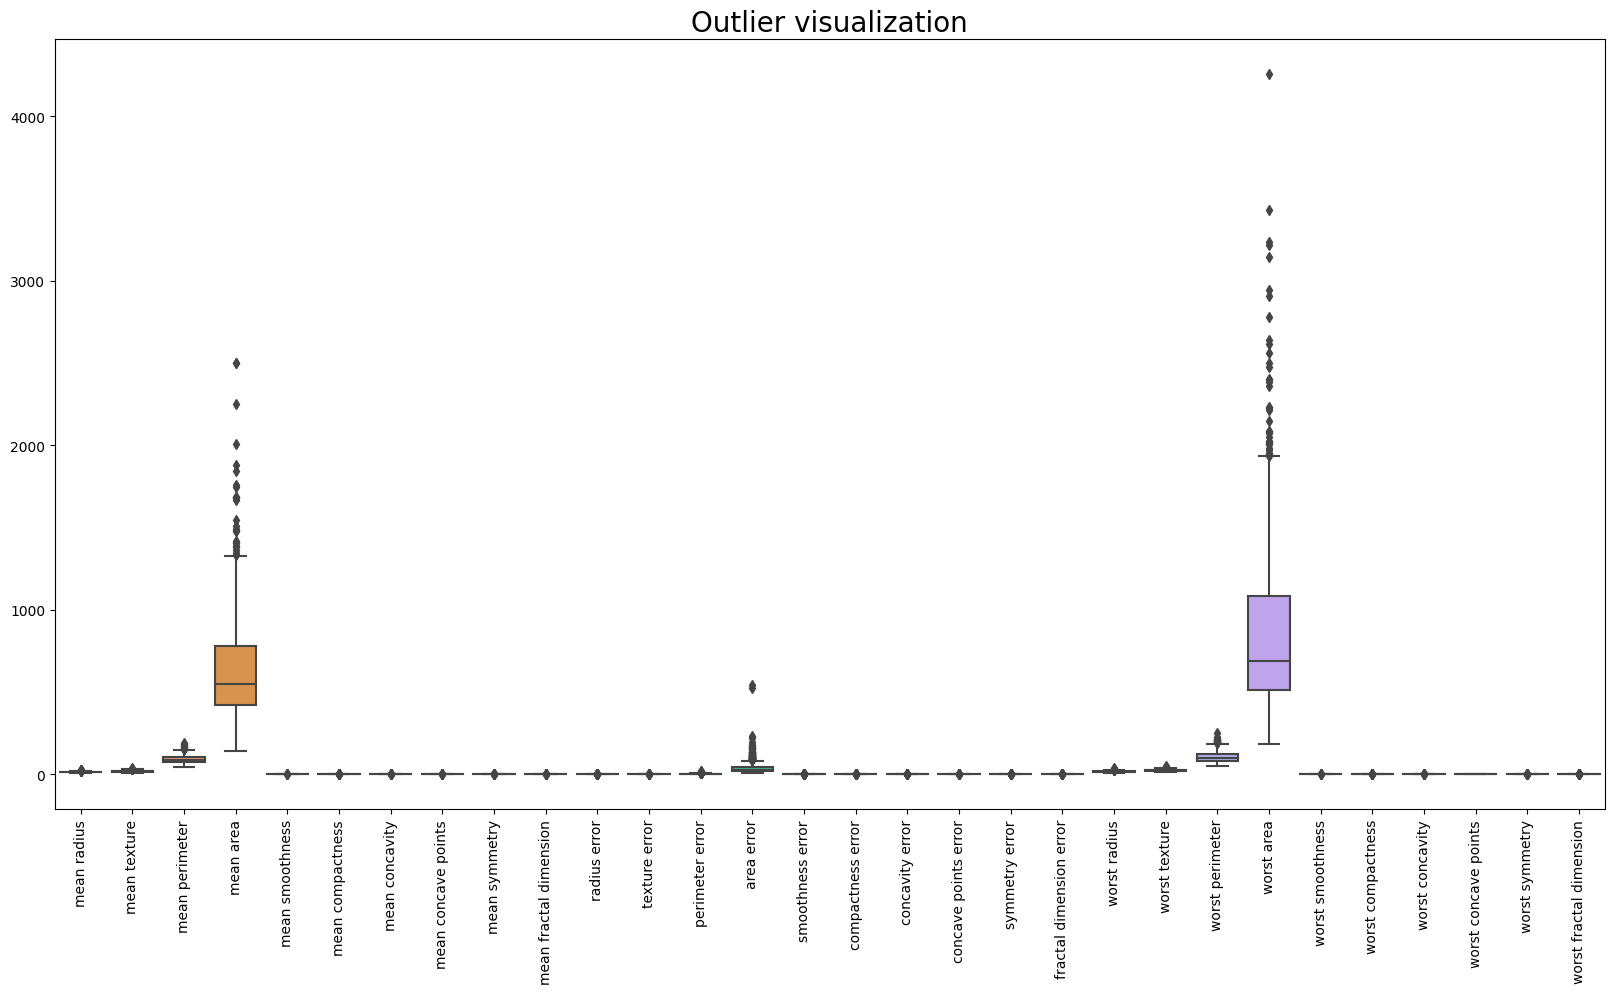

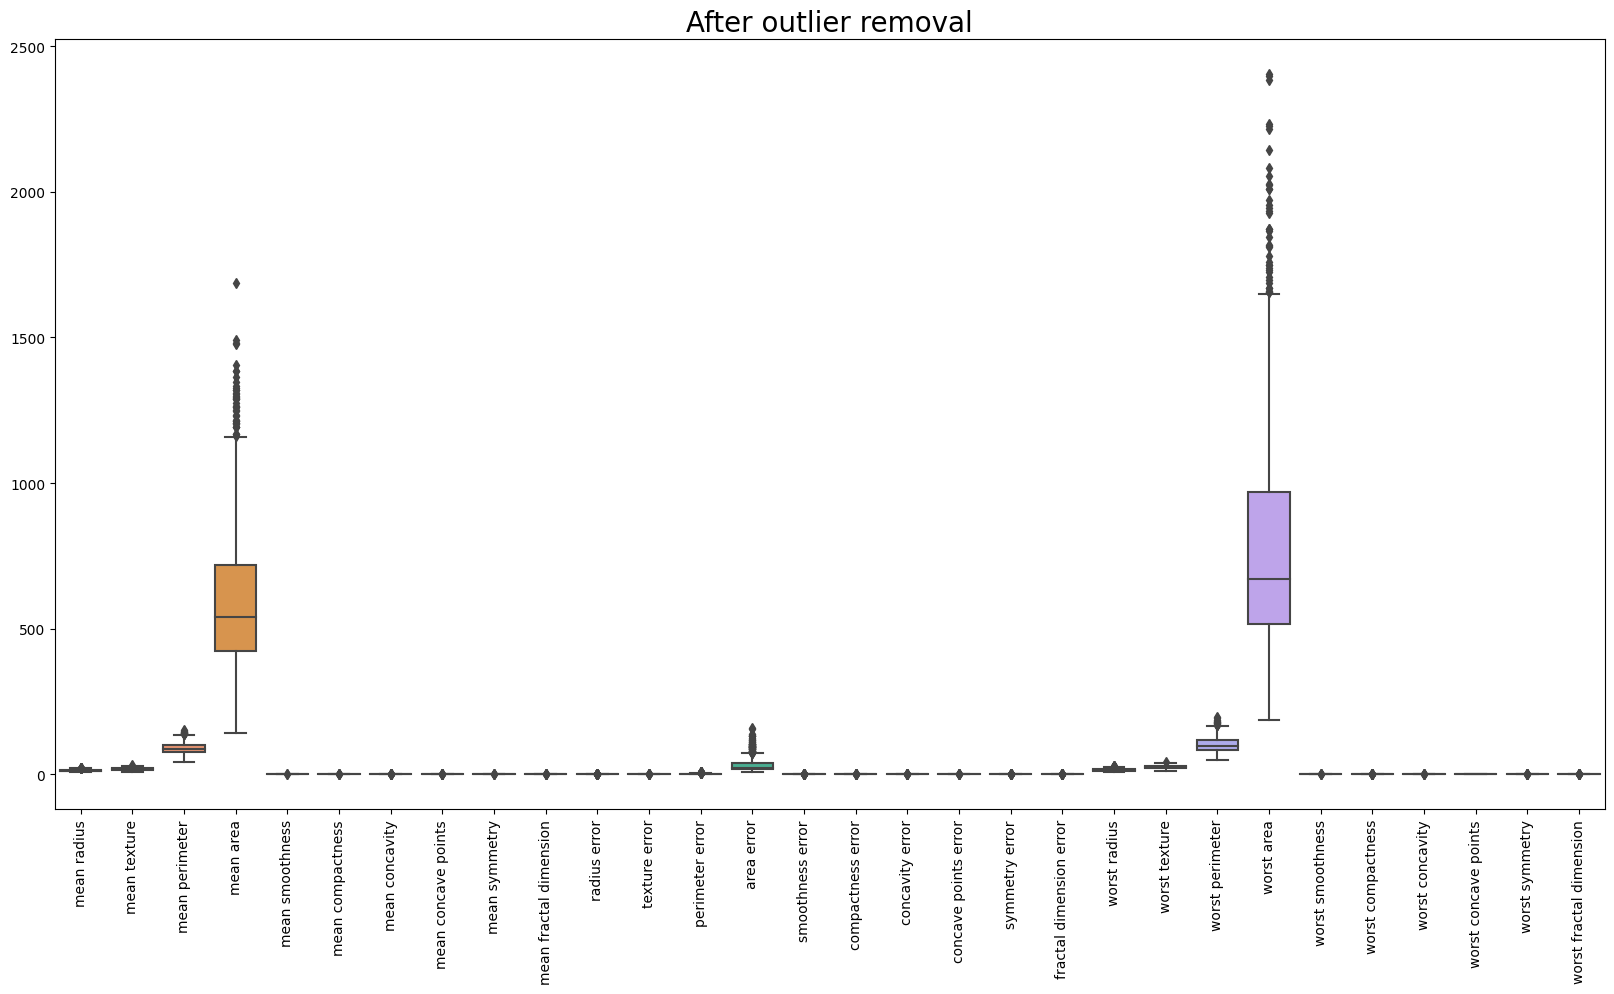

In [15]:
#### Strategy 1 : Removing Duplicates

# Outlier detection - We will use Z-score function defined in scipy library to detect the outliers
# We will calculate the Z-score for each value in the DataFrame, and identifies any values with a Z-score greater than 3 as outliers.
z = np.abs(stats.zscore(df))
print('\nZ-score array:\n', z)
#print(df)

# Define a threshold to identify an outlier
threshold = 3
#print('\nOutliers:\n', np.where(z > threshold))

# Visualizing the outliers using boxplot
plt.figure(figsize=(20,10))

# df_m = df.melt( )
# g = sns.FacetGrid(df_m, col="variable", height=4, aspect=.5, sharey=False )
# g.map(sns.boxplot, "variable", "value")

sns.boxplot(data=df)
plt.title('Outlier visualization', fontsize=20)
plt.xticks(rotation=90)
#plt.show()

## Removing the outliers
df_o = df[(z < threshold).all(axis=1)]

# Checking if the outliers have been removed
z = np.abs(stats.zscore(df_o))
print('\nAfter removing outliers:\n', np.where(z > threshold))

# Visualizing the data without outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df_o)
plt.title('After outlier removal', fontsize=20)
plt.xticks(rotation=90)
#plt.show()

print(df.shape)
print(df_o.shape)



#### Strategy 2 : Winsorize Method 

In the Winsorize Method, we limit outliers with an upper and lower limit. 
We will set the limits. We will make our upper and lower limits for data our new maximum and minimum points.

This data set consists of 345 observations and 6 predictors representing the blood test result liver disorder status of 345 patients. The three predictors are mean corpuscular volume (MCV), alkaline phosphotase (ALKPHOS), alamine aminotransferase (SGPT), aspartate aminotransferase (SGOT), gamma-glutamyl transpeptidase (GAMMAGT), and the number of alcoholic beverage drinks per day (DRINKS).

For this practical we use the BUPA Liver data set.  

Lower Limit : 0.5
Upper Limit : 10.0


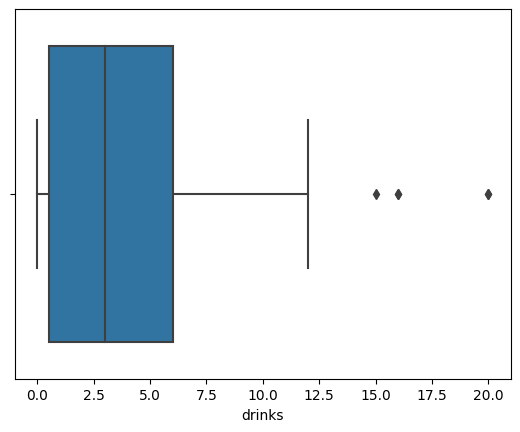

In [16]:
#### Strategy 2 : Winsorize Method

df_bupa = pd.read_csv('bupa.csv')
df_bupa = df_bupa.dropna()

sns.boxplot( x = df_bupa['drinks'] )
#sns.distplot( x = df_bupa['drinks'], bins = 10, kde = False )


## For outliers, 
##   our upper limit is 0 and 
##   our lower limit is 12.
##
## For the Winsorize Method, we have to import winsorize from Scipy. 
## We need boundaries to apply winsorize. 
## We will limit our data between 53 and 63. These values are within limits for outliers. 
## We need precise points of these values in the percentile and we can use the quantile method of Pandas.


from scipy.stats.mstats import winsorize

print( "Lower Limit : " + str(df_bupa['drinks'].quantile(0.05)))
print( "Upper Limit : " + str(df_bupa['drinks'].quantile(0.95)))



#### 
We will create a new variable with Winsorize Method. To implement the Winsorize Method, we write the exact boundary points as a tuple on the percentile. 
For example, we will write (0.05, 0.05). This means we want to apply quantile(0.05) and quantile(0.95) as a boundary. 
The first one is the exact point on percentile from the beginning, the second one is exact point on percentile from the end.

<Axes: >

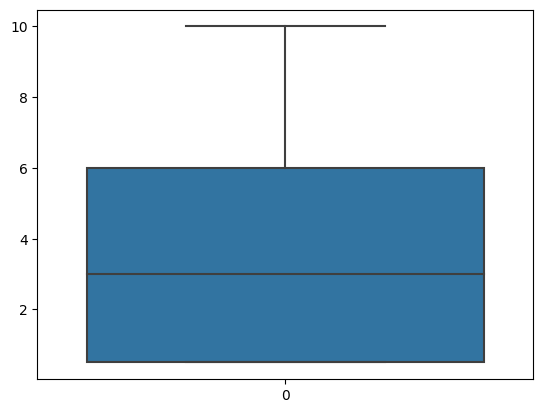

In [28]:
df_bupa_drinks = winsorize(df_bupa['drinks'], (0.05, 0.05) )
sns.boxplot( df_bupa_drinks )

#### Your Task 

#### Question 1: Remove outliers in the breast cancer dataset by applying Z-score threshold = 1. 
    1.1 How many samples are removed after the outlier removal ?

#### Question 2: Apply Winsorize method threshold of lower limit = 0.10 and upper limit = 0.80 on BUPA Liver data set.
    Use the "drinks" feature.
    2.1 What is the shape of the dataset after applying Winsorize method ? 


In [ ]:
## Question 1: Remove outliers in the breast cancer dataset by applying Z-score threshold = 1. 

z = np.abs(stats.zscore(df))
#print('\nZ-score array:\n', z)

print(df.shape)
# Define a threshold to identify an outlier
threshold = 1
#print('\nOutliers:\n', np.where(z > threshold))

# Visualizing the outliers using boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.title('Outlier visualization', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Removing the outliers
df_o = df[(z < threshold).all(axis=1)]
print(df_o.shape)
# Checking if the outliers have been removed
z = np.abs(stats.zscore(df_o))
#print('\nAfter removing outliers:\n', np.where(z > threshold))

# Visualizing the data without outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df_o)
plt.title('After outlier removal', fontsize=20)
plt.xticks(rotation=90)
plt.show()


### Question 2: Apply Winsorize method threshold of lower limit = 0.10 and upper limit = 0.80 on BUPA Liver data set
    2.1 What is the shape of the dataset after applying Winsorize method ? 

In [35]:
df_bupa_winsorize = df_bupa.copy()
df_bupa_winsorize['drinks'] = winsorize(df_bupa_winsorize['drinks'], (0.10, 0.10) )
#df_bupa_winsorize['drinks']


## Answer 2.1 
##   winsorize clips the outlier data points to the upper and lower limits.  

8.0